In [1]:
import numpy as np

from src.dataset import PandemicDataset
from src.problem import SIRProblem
from src.dinn import DINN
from src.plotter import Plotter

In [2]:
different_datasets = ['SIR_RKI_5', 'SIR_RKI_3', 'SIR_RKI_1']


Learning Rate:	0.001
Optimizer:	Adam
Scheduler:	PolynomialLR

torch seed: 2726058308202330945

Epoch 0 | LR 0.0009999
physics loss:		0.0017453333036437392
observation loss:	0.706427488707642
loss:			0.7081728220112858
---------------------------------
alpha:			0.6988420486450195
beta:			0.7285336256027222
#################################

Epoch 1000 | LR 0.0008998999999999944
physics loss:		0.00022190090358836486
observation loss:	0.002269284158826686
loss:			0.002491185062415051
---------------------------------
alpha:			0.49111518263816833
beta:			0.6344270706176758
#################################

Epoch 2000 | LR 0.0007998999999999963
physics loss:		4.3248321537012514e-05
observation loss:	0.0011222293390763629
loss:			0.0011654776606133755
---------------------------------
alpha:			0.19979670643806458
beta:			0.25964564085006714
#################################

Epoch 3000 | LR 0.000699900000000002
physics loss:		3.0365439851412283e-05
observation loss:	0.0008651180948592972
l

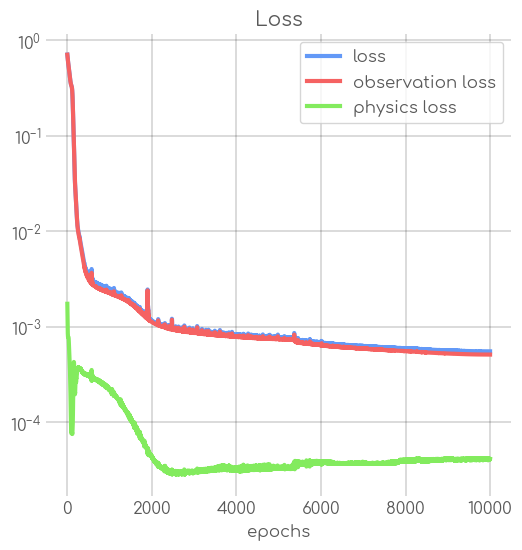

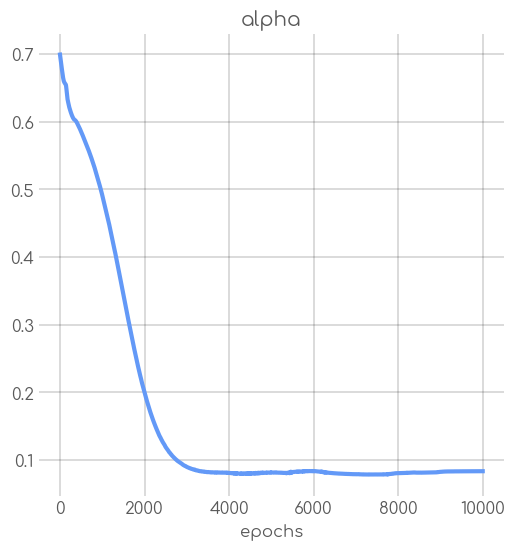

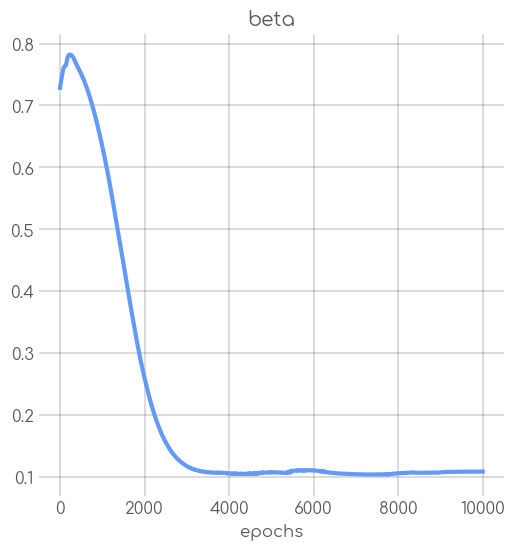

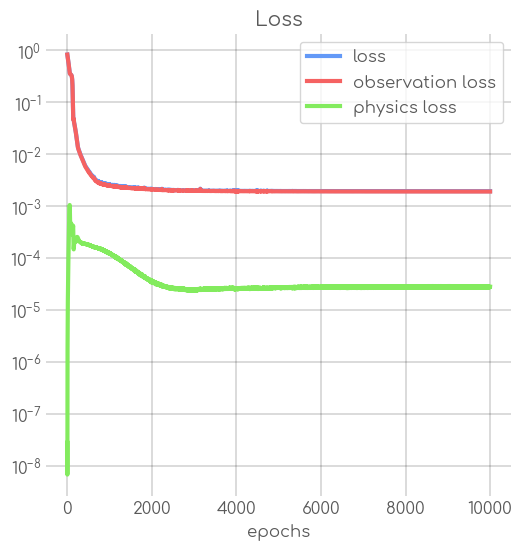

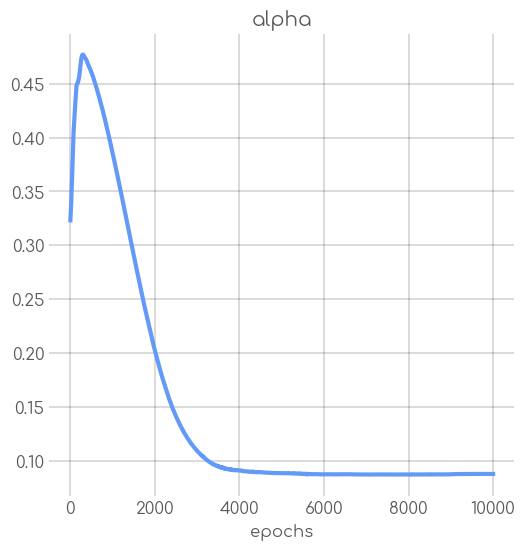

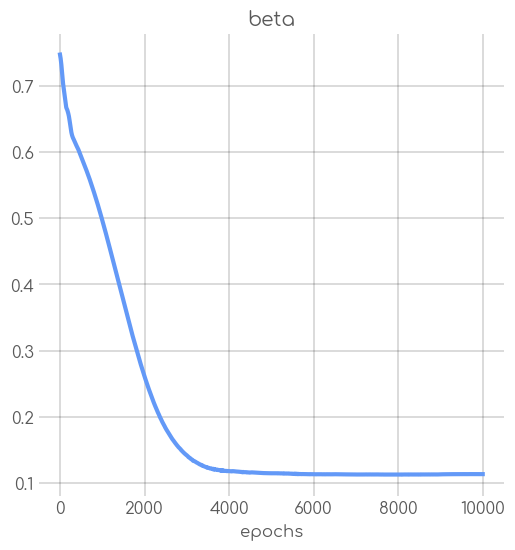

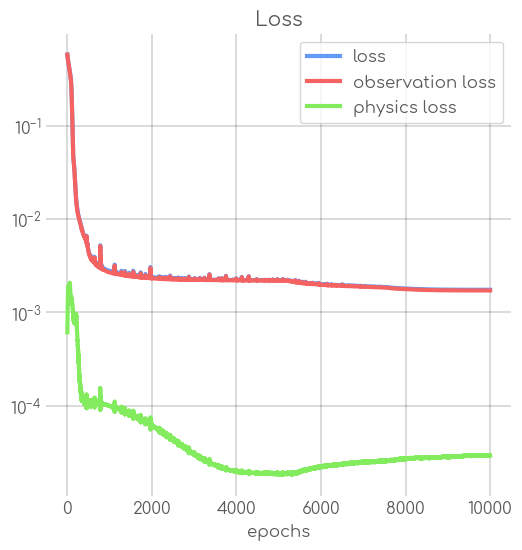

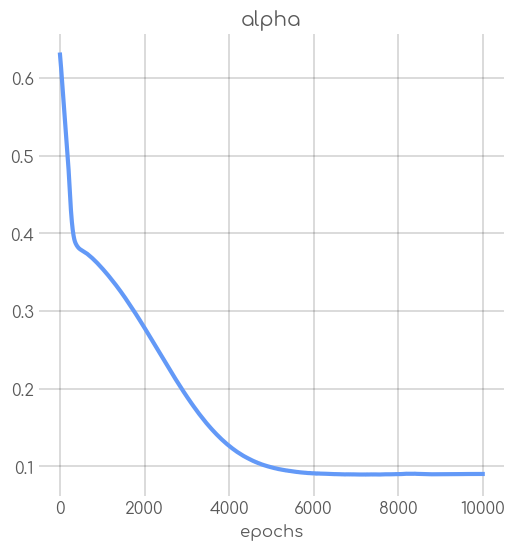

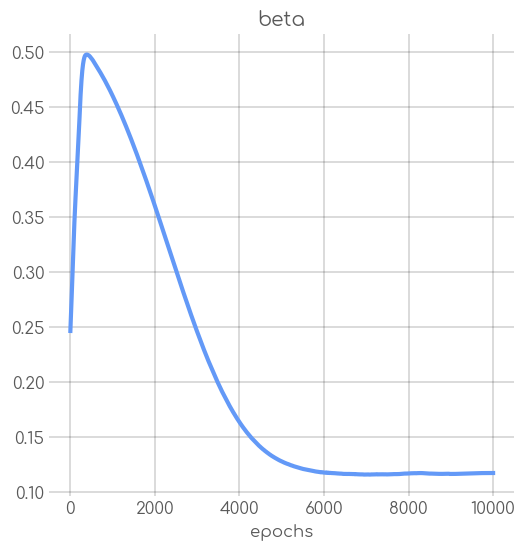

In [3]:
for dataset_name in different_datasets:
    covid_data = np.genfromtxt(f'./datasets/{dataset_name}.csv', delimiter=',')
    plotter = Plotter()
    dataset = PandemicDataset(dataset_name, ['S', 'I', 'R'], 83100000, *covid_data)
    problem = SIRProblem(dataset)
    dinn = DINN(3, dataset, ['alpha', 'beta'], problem, plotter)
    dinn.configure_training(1e-3, 10000, scheduler_name=Scheduler.POLYNOMIAL, verbose=True)
    dinn.train(create_animation=True, animation_sample_rate=100, verbose=True)
    dinn.plot_training_graphs()